### Objective : Data contains details of some decision rules which can help in predicting qualitative bankruptcy. Predict the Bankruptcy from Qualitative parameters from experts.

#### Attribute Information (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)

#### 1. Industrial Risk: {P,A,N}
#### 2. Management Risk: {P,A,N}
#### 3. Financial Flexibility: {P,A,N}
#### 4. Credibility: {P,A,N}
#### 5. Competitiveness: {P,A,N}
#### 6. Operating Risk: {P,A,N}
#### 7. Class: {B,NB}


In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [135]:
bank_df_orig = pd.read_csv('Qualitative_Bankruptcy.data.txt', header = None)
Catcols = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']
bank_df_orig.columns = Catcols
bank_df_orig  # Class is the target variable

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [136]:
bank_df = bank_df_orig.copy()

In [137]:
bank_df['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1A493270>,
      dtype=object)

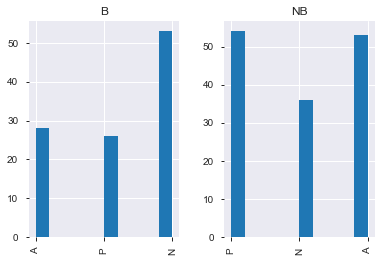

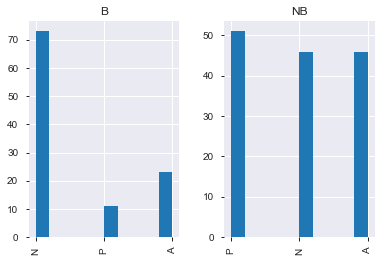

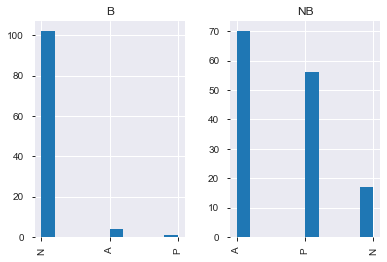

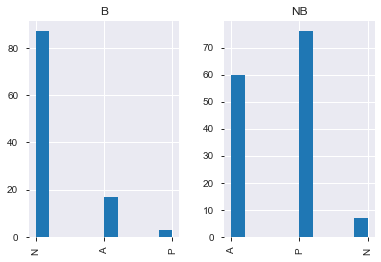

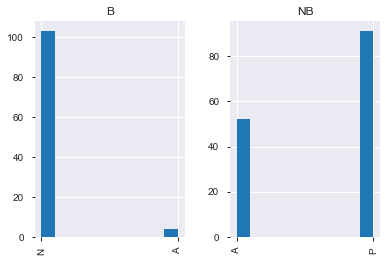

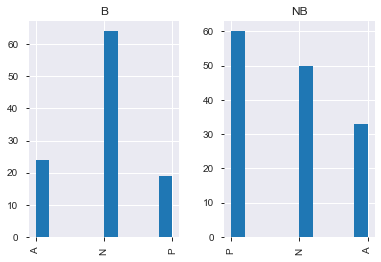

In [138]:
### Categorical Variables
bank_df.hist('Industrial Risk', by = 'Class')
bank_df.hist('Management Risk', by = 'Class')
bank_df.hist('Financial Flexibility', by = 'Class')
bank_df.hist('Credibility', by = 'Class')
bank_df.hist('Competitiveness', by = 'Class')
bank_df.hist('Operating Risk', by = 'Class')

In [139]:
# Decision Rules --> A-Average, N-Negative and P- Positive

# Based on the distrbution we could see the different decision rules on risks which lead to bankruptcy
# There are more Negative decision values for Industrial risk, Management risk, 
# Financial flexibility, Credibility, Competitiveness and Operating risk 
# than the average or positive values

# Industrial risk has almost equal number of positive and negative decision rules leading to Bankruptcy 
# and non-bankruptcy respectively, we can say higher the negative deicsion rule higher the bankruptcy and vice versa. 
# There are quite a few Average deicsion rules which led to bankruptcy as well

# Management Risk has high number of negeative decision rules influencing bankruptcy than postiive decision rules(70-50), 
# but there are less number of positive and average decision rules leading to bankruptcy 
# compared to the higher number of average and positive decision rules leading to non-bankruptcy
# we can conclude that higher the negative deicisions on management risk, higher the probability of bankruptcy

# Higher the financial flexibility decisions higher the bankruptcy, 
# but positive decisions on financial flexibility does not guarantee Non-bankruptcy

# Creditibility also works the same way as Industrial risk with equal number of cases negative vs positive deicsions 
# leading to bankruptcy and non-bankruptcy respectively.

# Competitiveness becomes the key decision rule for bankruptcy as higher positive cases led to non-bankruptcy 
# and higher negative cases led to Bankruptcy. No cases of Bankruptcy for positive decisions. 
# and very less number of Average decisions for Bankruptcy

# Operating risk also works the same way as Industrial risk with equal number of cases negative vs positive deicsions 
# leading to bankruptcy and non-bankruptcy respectively.

# The negative decisions on Industrial risk, management risk, financial flexibility, credibility, competitiveness 
# and Operating risk led to more bankrupt cases than the average and positive ones

# The risk decisions are directy proportional to the Bankruptcy, higher(negative) decisions taken 
# on the different parameters like Industrial risk, Management risk, Financial flexibility, Credibility, Competitiveness 
# and Operating Risk, higher the Bankruptcy

# The Positve deisions taken on Industrial risk, Management Risk, Credibility, competitiveness and Operating Risk 
# led to Non-Bankruptcy

# The higher the Average Decisions taken on Industrial risk, Management Risk, financial flexibility, credibility, 
# competitiveness and Operating Risk higher the number of non-bankruptcy cases

In [140]:
# Chi-Square Test to check the variables are related
from scipy.stats import chi2_contingency
Features ={'Feature':['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'],
          'Statistics': 0,
          'p-value': 0}
Statresults = pd.DataFrame(Features)
def PerformChisquareTest(feature):
    table = pd.crosstab(bank_df[feature],bank_df['Class'])
    stat, p, dof, expected = chi2_contingency(table)
    Statresults.loc[Statresults.Feature == bank_df[feature].name, ['Statistics','p-value']] = stat,p

In [141]:
for cols in bank_df.columns[:-1]:
    PerformChisquareTest(cols)
Statresults

,Feature,Statistics,p-value
0,Industrial Risk,15.909132,3.510556e-04
1,Management Risk,35.143913,2.336664e-08
2,Financial Flexibility,171.011419,7.334022e-38
3,Credibility,157.638583,5.877824e-35
4,Competitiveness,234.828256,1.017870e-51
5,Operating Risk,19.642131,5.429570e-05
6,Class,0.000000,0.000000e+00


In [142]:
# Since the P-values are pre-dominantly less for each of the feature p < 0.05, he we infer 
# that the variables are related with the class variable 
# To further investigate we will do cross tab and manual encoding

In [143]:
pd.crosstab(bank_df['Industrial Risk'],bank_df['Class']).apply(lambda r: r/r.sum(), axis=0)
# 26% of the Average decisions led to B while 37% helped in NB
# 50% of negative decisions led to B while 25% helped in NB
# 24% of positive decisions led to B while 38% helped in NB

Class,B,NB
Industrial Risk,,
A,0.261682,0.370629
N,0.495327,0.251748
P,0.242991,0.377622


In [144]:
pd.crosstab(bank_df['Management Risk'],bank_df['Class']).apply(lambda r: r/r.sum(), axis=0)
# 21% of Average decisions led to B while 32% led to NB
# 68% of negative decisions led to B while 32% led to NB
# 10% of Positive decisions led to B while 35% led to NB

Class,B,NB
Management Risk,,
A,0.214953,0.321678
N,0.682243,0.321678
P,0.102804,0.356643


In [145]:
pd.crosstab(bank_df['Operating Risk'],bank_df['Class']).apply(lambda r: r/r.sum(), axis=0)
# 22% of Average decisions led to B while 23% led to NB
# 59% of negative decisions led to B while 34% led to NB
# 17% of Positive decisions led to B while 42% led to NB

Class,B,NB
Operating Risk,,
A,0.224299,0.230769
N,0.598131,0.349650
P,0.177570,0.419580


In [146]:
# Decision Rules --> 0-Average, 1-Negative and 2- Positive
# over 85% of Negative Decisions taken on Financial Flexibility, Credibility and Competitiveness lead to bankruptcy and 
# over 78% Positive decisions taken on it led to non-bankruptcy


In [147]:
pd.crosstab(bank_df['Financial Flexibility'],bank_df['Class']).apply(lambda r: r/r.sum(), axis=0)
# 4% of average decisions led to B while 49% led to NB
# 95% of negative decisions led to B while 12% led to NB
# 1% of positive deicsion led to B while 39% led to NB

Class,B,NB
Financial Flexibility,,
A,0.037383,0.489510
N,0.953271,0.118881
P,0.009346,0.391608


In [148]:
pd.crosstab(bank_df['Credibility'],bank_df['Class']).apply(lambda r: r/r.sum(), axis=0)
# 22% of average decisions led to B while 78% led to NB
# 49% of Average decisions, 12% of negative decisions and 39% of positive decisions lead to non-bankruptcy

Class,B,NB
Credibility,,
A,0.158879,0.419580
N,0.813084,0.048951
P,0.028037,0.531469


In [149]:
pd.crosstab(bank_df['Competitiveness'],bank_df['Class']).apply(lambda r: r/r.sum(), axis=1)
#  7% of Average decission taken on competiveness led to bankruptcy while 93% led to NB
# 100% of negative decisions taken on competitiveness led to B
# 0% of Positive decisions led to B while 100% led to NB

Class,B,NB
Competitiveness,,
A,0.071429,0.928571
N,1.000000,0.000000
P,0.000000,1.000000


In [150]:
manual_encode = {
                    "Industrial Risk": {"N": 0, "A": 1, "P": 2},
                    "Management Risk": {"N": 0, "A": 1, "P": 2},
                    "Financial Flexibility": {"N": 0, "A": 1, "P": 2},
                    "Credibility": {"N": 0, "A": 1, "P": 2},
                    "Competitiveness": {"N": 0, "A": 1, "P": 2},
                    "Operating Risk": {"N": 0, "A": 1, "P": 2}, 
                    "Class": {"NB": 0, "B": 1}
                }

In [151]:
bank_df.replace(manual_encode, inplace=True)

In [152]:
'''bank_df[bank_df.select_dtypes(['object']).columns] = bank_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
cat_col = bank_df.columns[bank_df.dtypes == 'category']

# One-hot encoding for the features
bank_df = pd.get_dummies(data=bank_df, columns=cat_col)
bank_df = bank_df.join(Class)'''

"bank_df[bank_df.select_dtypes(['object']).columns] = bank_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))\ncat_col = bank_df.columns[bank_df.dtypes == 'category']\n\n# One-hot encoding for the features\nbank_df = pd.get_dummies(data=bank_df, columns=cat_col)\nbank_df = bank_df.join(Class)"

In [153]:
'''# Label encoding for the Class

bank_df[bank_df.select_dtypes(['object']).columns] = bank_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in bank_df.columns:
    bank_df[feature] = le.fit_transform(bank_df[feature])

bank_df['Class'] = le.fit_transform(bank_df['Class']) '''

"# Label encoding for the Class\n\nbank_df[bank_df.select_dtypes(['object']).columns] = bank_df.select_dtypes(['object']).apply(lambda x: x.astype('category'))\n\nfrom sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\nfor feature in bank_df.columns:\n    bank_df[feature] = le.fit_transform(bank_df[feature])\n\nbank_df['Class'] = le.fit_transform(bank_df['Class']) "

In [154]:
bank_df.info()
bank_df.to_csv('EncodedBank.csv', index= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
Industrial Risk          250 non-null int64
Management Risk          250 non-null int64
Financial Flexibility    250 non-null int64
Credibility              250 non-null int64
Competitiveness          250 non-null int64
Operating Risk           250 non-null int64
Class                    250 non-null int64
dtypes: int64(7)
memory usage: 13.7 KB


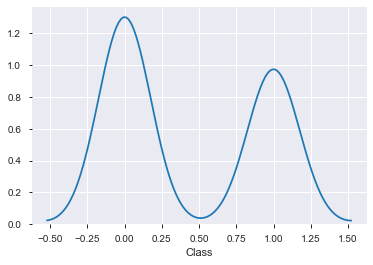

In [155]:
sns.distplot(bank_df['Class'], kde = True, hist = False) # B-0, NB-1

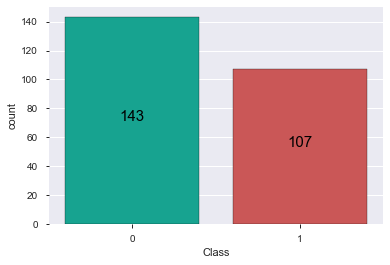

In [156]:
 # B-0, NB-1
plot = sns.countplot(bank_df['Class'], edgecolor = 'black', palette = ['#00baa1','#dd4444'])

bars = plot.patches

plot.annotate(bars[0].get_height(), (0, bars[0].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')

plot.annotate(bars[1].get_height(), (1, bars[1].get_height()/2),
              ha = 'center', fontsize = 15, color = 'black')

plt.show()
# Target Variable as more or less balanced distribution B -107 & NB-143 out of 250 entries; 
# NB entries are higher; which means the non-bankruptcy risks is lesser than the bankruptcy risks

In [157]:
from pandas_profiling import ProfileReport
ProfileReport(bank_df)

Number of variables,7
Number of observations,250
Total Missing (%),0.0%
Total size in memory,13.7 KiB
Average record size in memory,56.2 B
Numeric,6
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [158]:
bank_df.corr()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial Risk,1.000000,0.255127,0.162624,0.014438,0.257814,0.144507,-0.227823
Management Risk,0.255127,1.000000,0.254845,0.303341,0.306568,0.213874,-0.370838
Financial Flexibility,0.162624,0.254845,1.000000,0.524951,0.686612,0.116903,-0.751020
Credibility,0.014438,0.303341,0.524951,1.000000,0.675689,0.288458,-0.755909
Competitiveness,0.257814,0.306568,0.686612,0.675689,1.000000,0.211383,-0.899452
Operating Risk,0.144507,0.213874,0.116903,0.288458,0.211383,1.000000,-0.279786
Class,-0.227823,-0.370838,-0.751020,-0.755909,-0.899452,-0.279786,1.000000


In [159]:
# Competitiveness has the highest negative correlation with -0.89
# Credibility is at -0.76
# Financial flexibility is at -0.75

In [160]:
# function to get the relationship of the independent features with each other
def Check_Independent_feature_relationship(data):
    for feature in data:
        for sec_feature in data:
            if((feature != sec_feature)):
                cross_ind_risk = pd.crosstab(data[sec_feature], data[feature]) 
                chi_data, p , s, r = stats.chi2_contingency(cross_ind_risk)
                if((p < 0.05)):
                    print(feature, "<->", sec_feature)
                    print('p-value :', p)
                    print()

In [161]:
from scipy import stats
bank_df_features = bank_df.drop('Class', axis = 1)
Check_Independent_feature_relationship(bank_df_features)

Industrial Risk <-> Management Risk
p-value : 2.1012510084321396e-09

Industrial Risk <-> Competitiveness
p-value : 0.0003575530193327008

Industrial Risk <-> Operating Risk
p-value : 0.0003771481154645862

Management Risk <-> Industrial Risk
p-value : 2.1012510084321545e-09

Management Risk <-> Financial Flexibility
p-value : 0.00023078252706102613

Management Risk <-> Credibility
p-value : 1.5333488886415346e-05

Management Risk <-> Competitiveness
p-value : 2.7052075598063043e-07

Management Risk <-> Operating Risk
p-value : 1.1897511772752368e-05

Financial Flexibility <-> Management Risk
p-value : 0.00023078252706102613

Financial Flexibility <-> Credibility
p-value : 5.938647613813407e-22

Financial Flexibility <-> Competitiveness
p-value : 1.062155440186545e-34

Credibility <-> Management Risk
p-value : 1.5333488886415404e-05

Credibility <-> Financial Flexibility
p-value : 5.938647613813407e-22

Credibility <-> Competitiveness
p-value : 2.9375805986081766e-30

Credibility <-> O

In [162]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
cluster_range = range( 1, 12 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 10, random_state=6)
  clusters.fit(bank_df_features)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:11]

,num_clusters,cluster_errors
0,1,1050.928000
1,2,655.565989
2,3,547.179105
3,4,492.647730
4,5,434.152779
5,6,398.362857
6,7,369.411996
7,8,328.295019
8,9,307.067785
9,10,283.766086


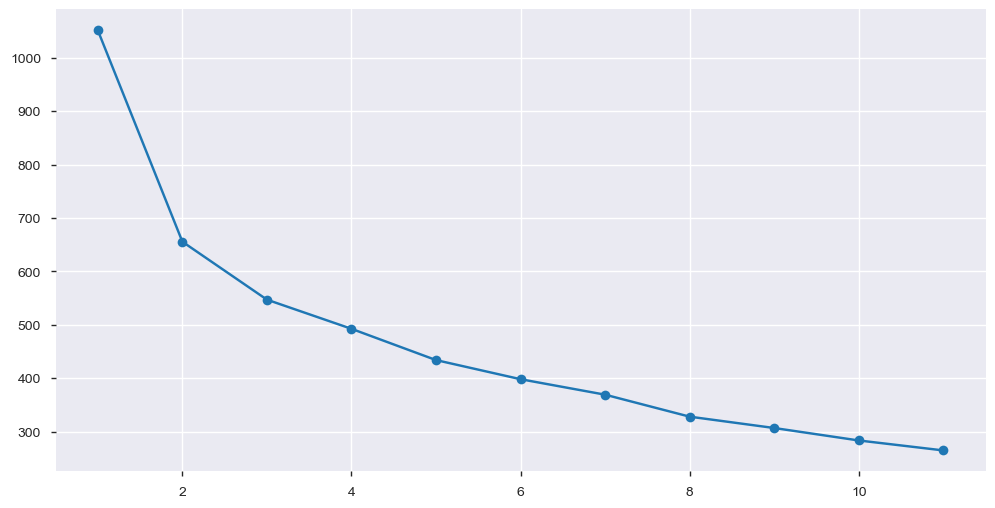

In [163]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [164]:
# The elbow plot confirms 2 is the optimal number of clusters

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.3446100520145501


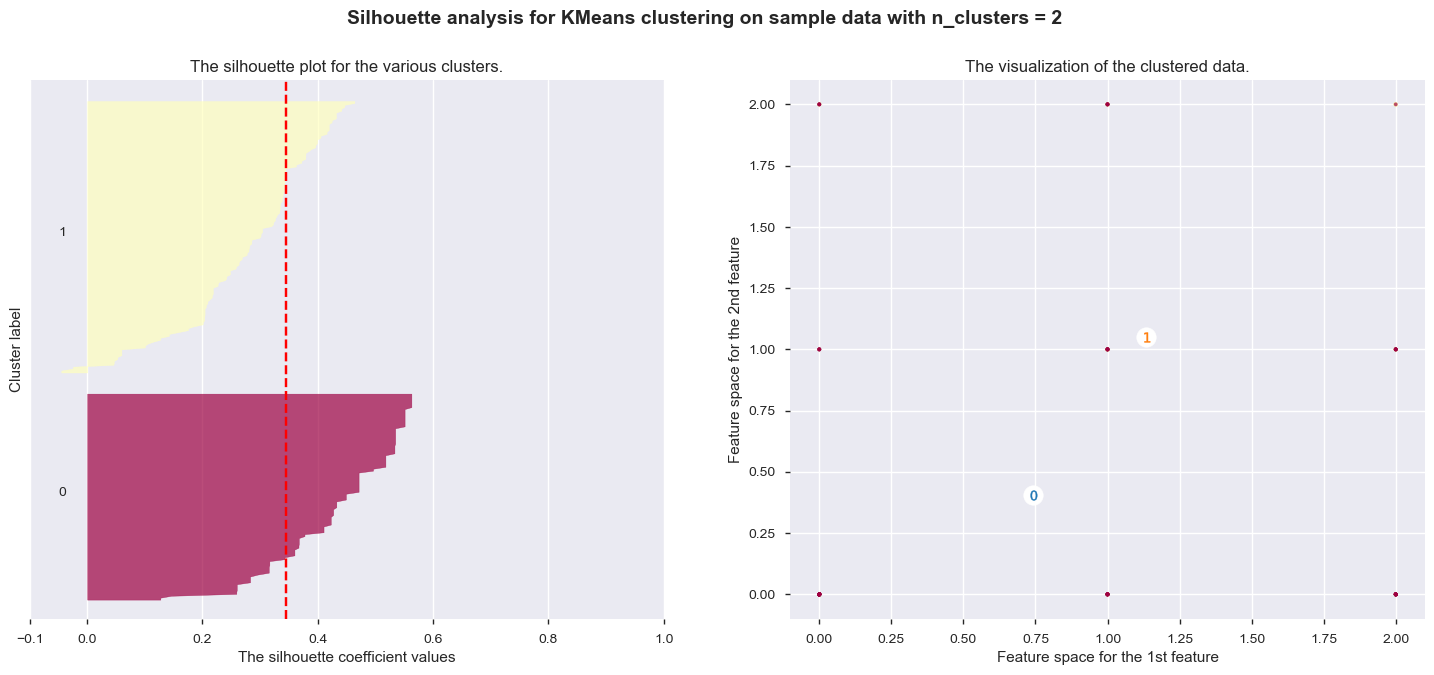

For n_clusters = 3 The average silhouette_score is : 0.29613292157554566


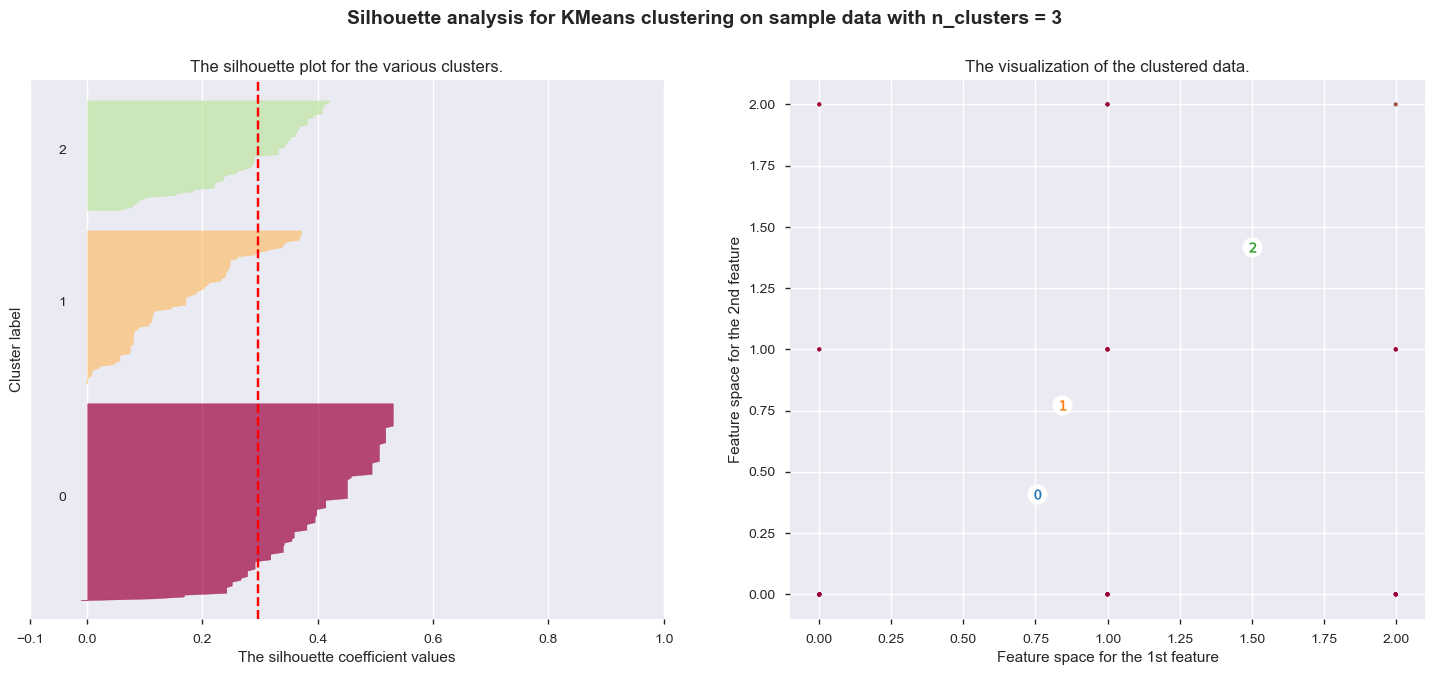

For n_clusters = 4 The average silhouette_score is : 0.24766884894775332


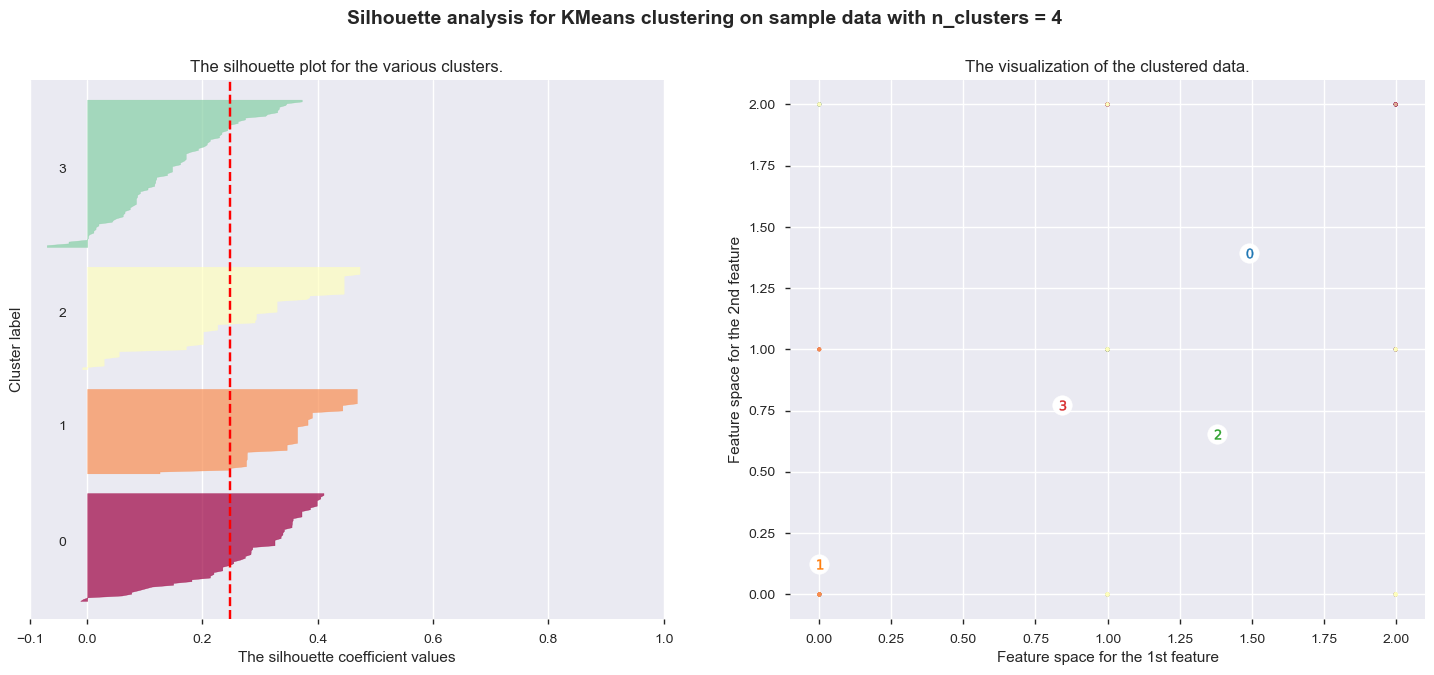

For n_clusters = 5 The average silhouette_score is : 0.25284094504213755


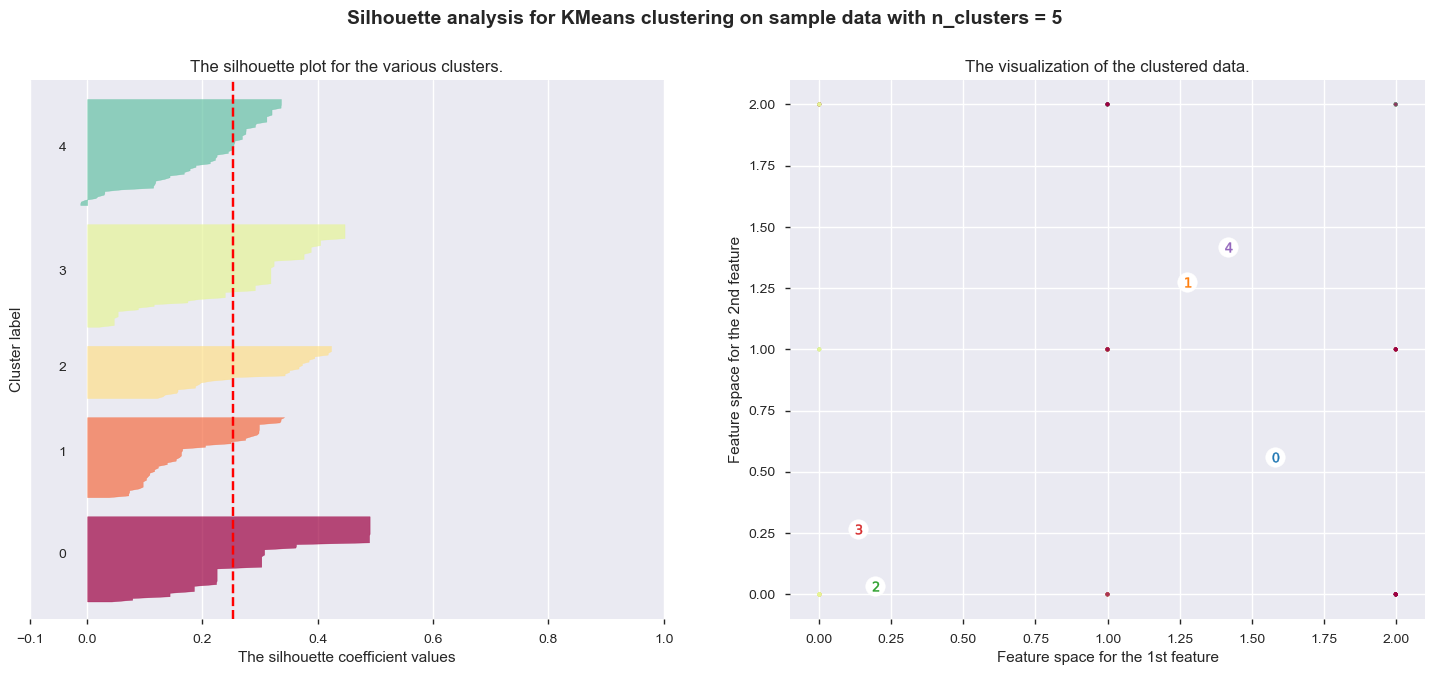

For n_clusters = 6 The average silhouette_score is : 0.2601540911177651


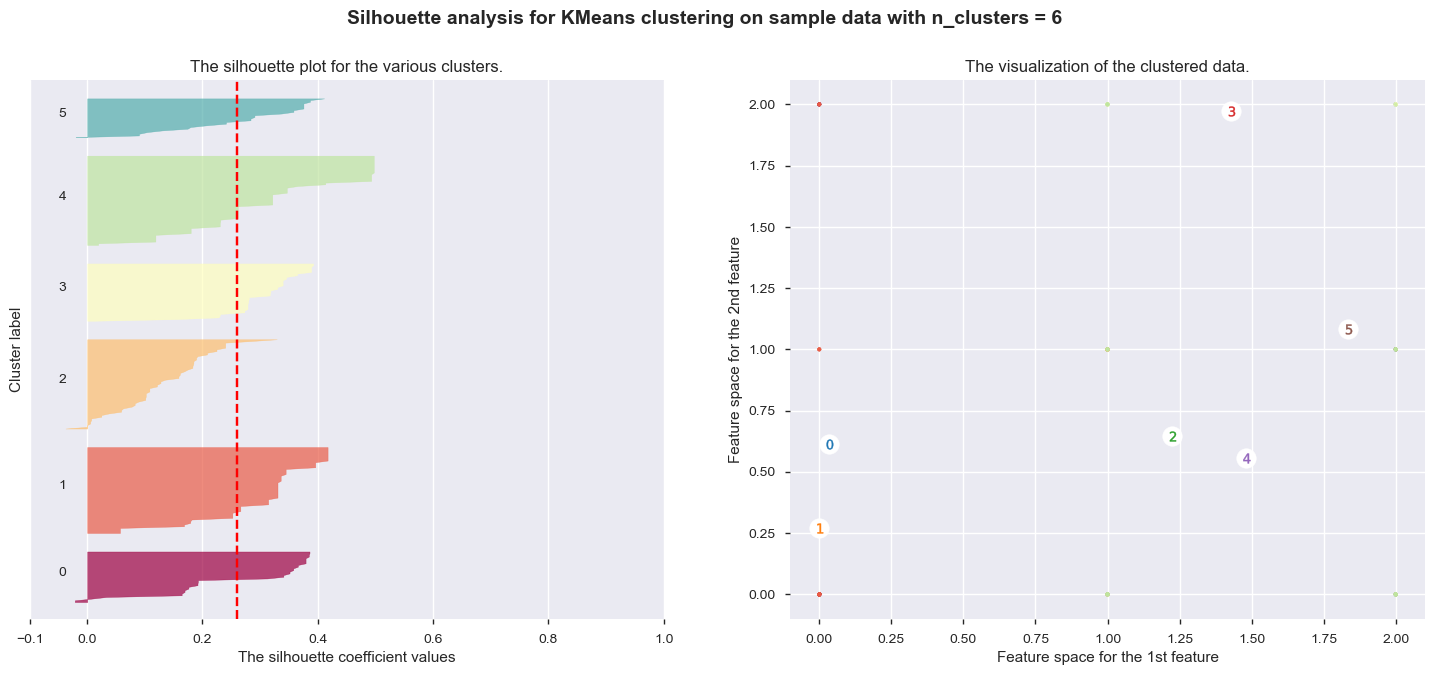

In [165]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

#X=df_scaled.values

X=bank_df_features.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [166]:
# silhoutte score also confirms that the optimal number of cluster is 2
# Create K Means cluster and store the result 
final_model=KMeans(2, random_state = 10)
# Fit K means on the scaled_df
final_model.fit(bank_df_features)
prediction=final_model.predict(bank_df_features)
bank_df_features["GROUP"] =  prediction
bank_df_features['GROUP'].value_counts()

1    142
0    108
Name: GROUP, dtype: int64

In [167]:
# After clustering of data we are able to see clearly 2 cluster of data - NB(0) and B(1)

In [168]:
# Using ward linkage method for Dendograms
bank_df_features = bank_df_features.drop(['GROUP'],axis=1) # Independent Variables
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(bank_df_features, method='ward', metric='euclidean', optimal_ordering=True)

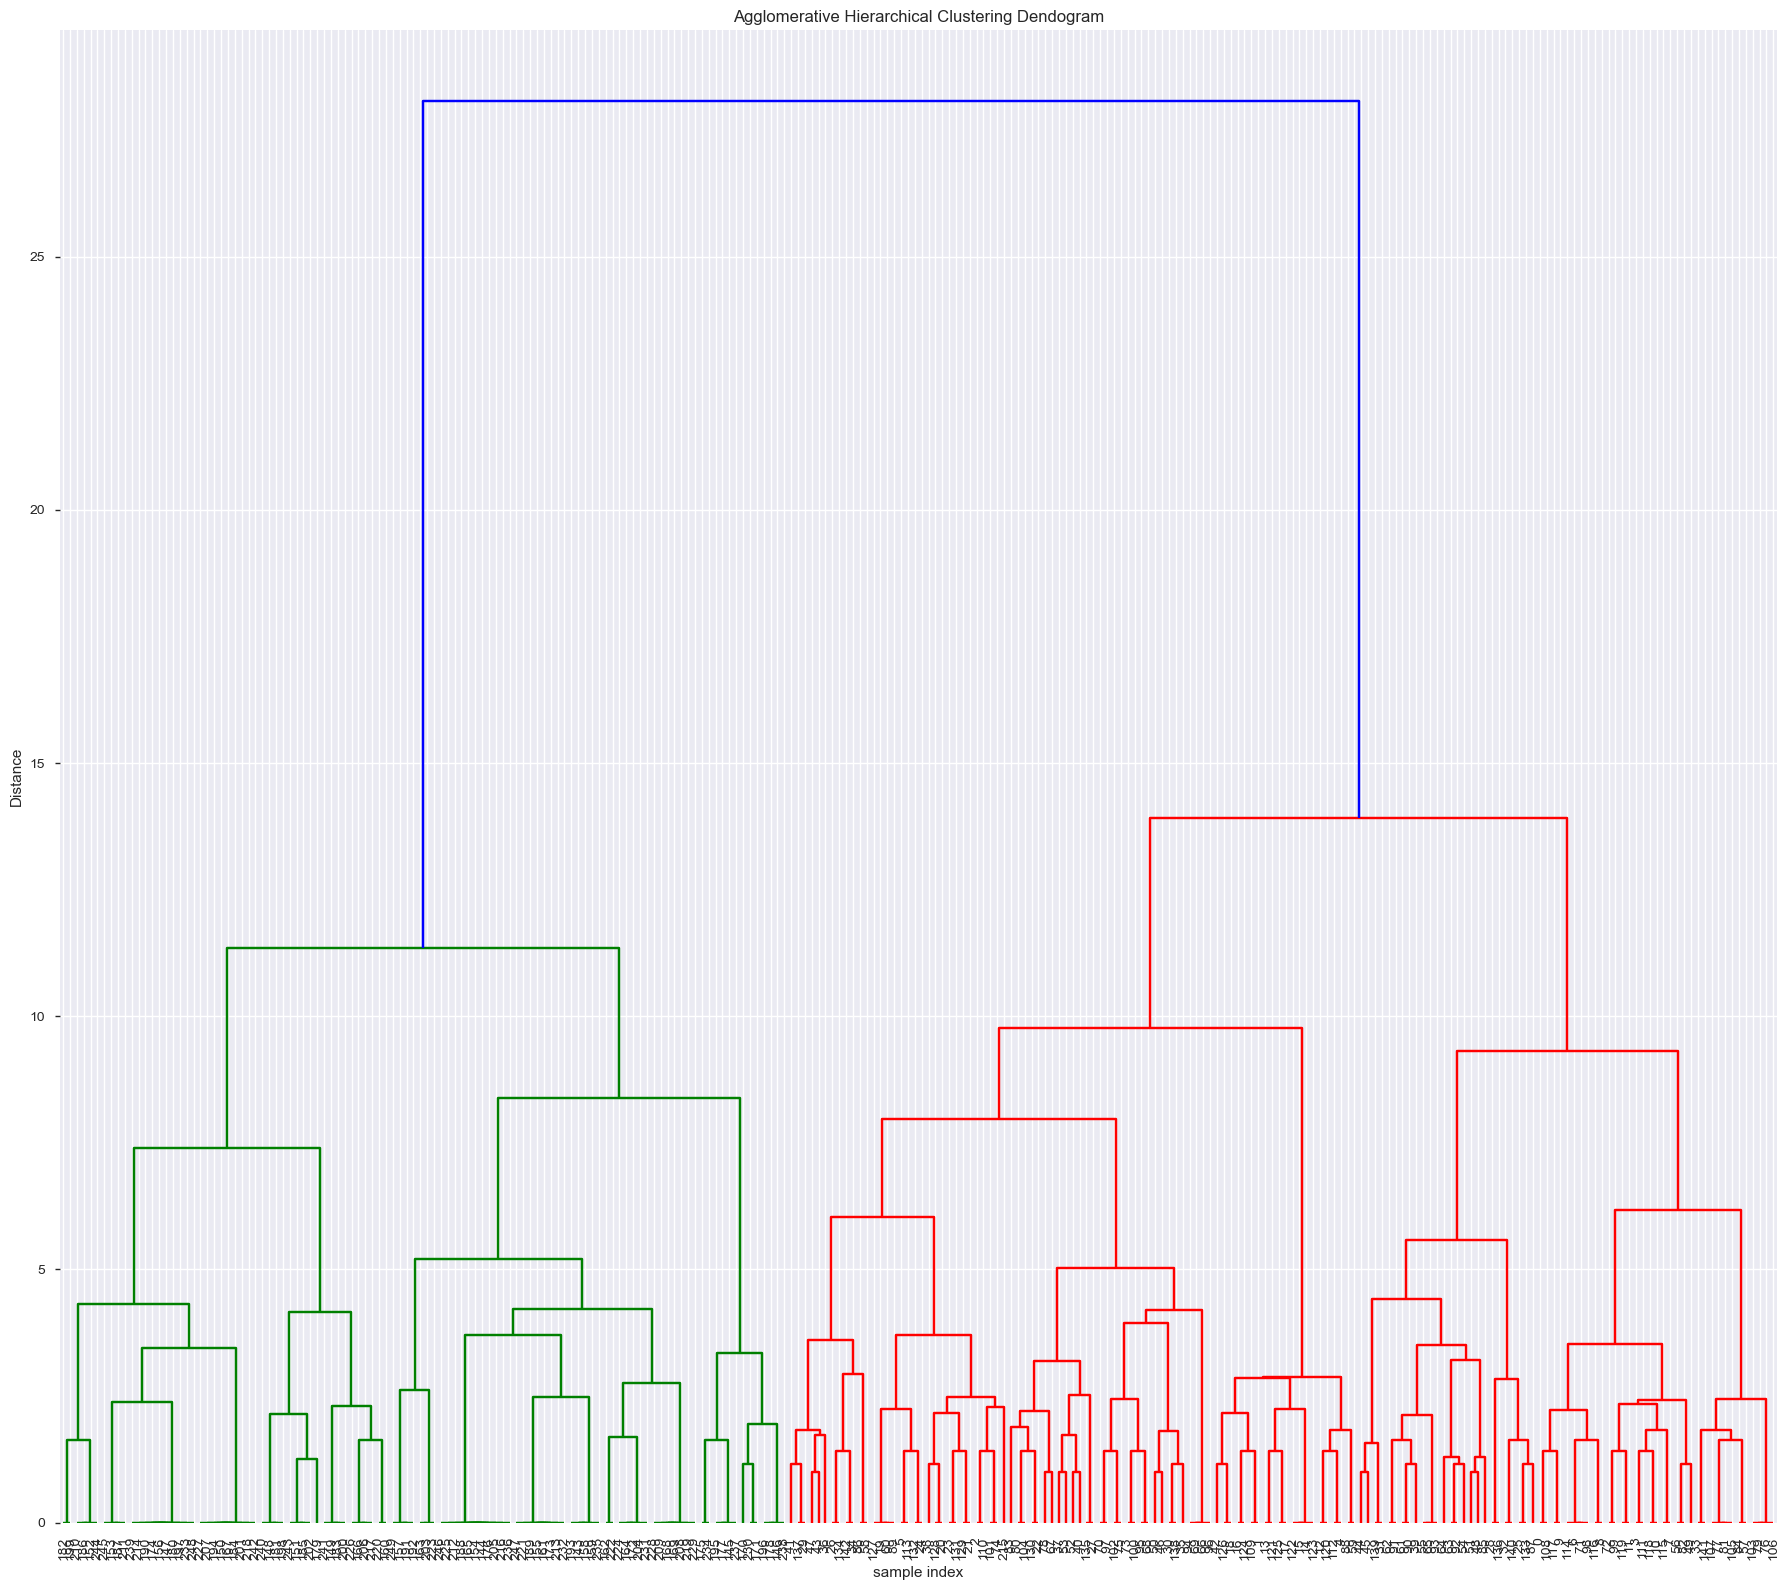

In [169]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

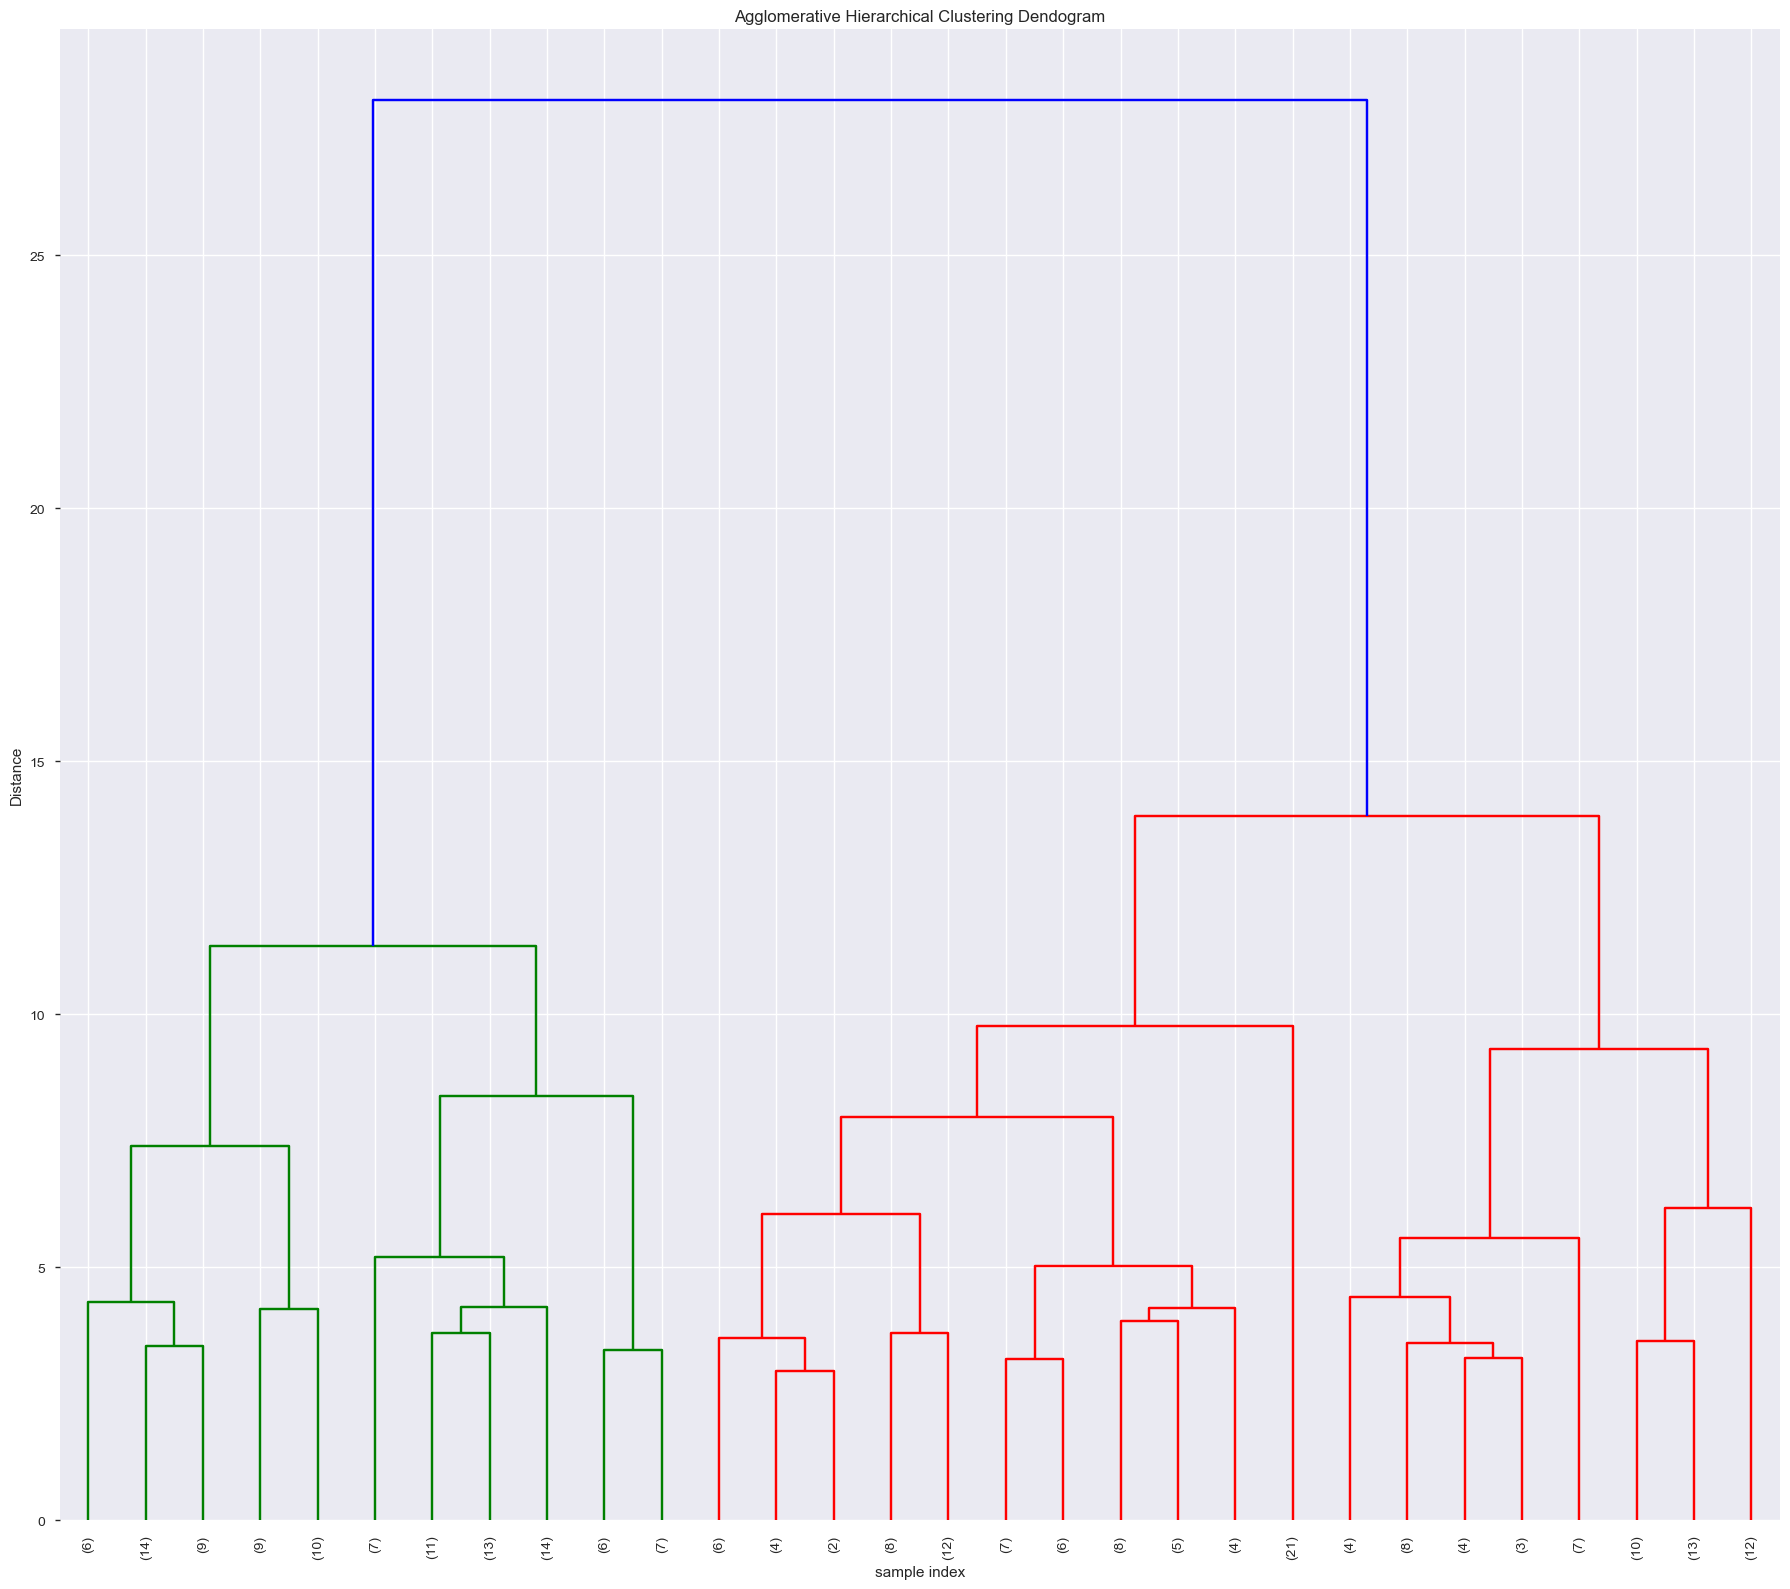

In [170]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

In [171]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
c, coph_dists = cophenet(Z , pdist(bank_df_features))
# closer it is to 1, the better is the clustering
c, coph_dists

(0.7267590679830318,
 array([13.91581554, 13.91581554,  3.5336888 , ..., 11.33961094,
         5.20055585, 11.33961094]))

In [172]:
# Identifying the Maximum distance and plotting them in the Dendogram for finding optimal clusters
# Credits: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

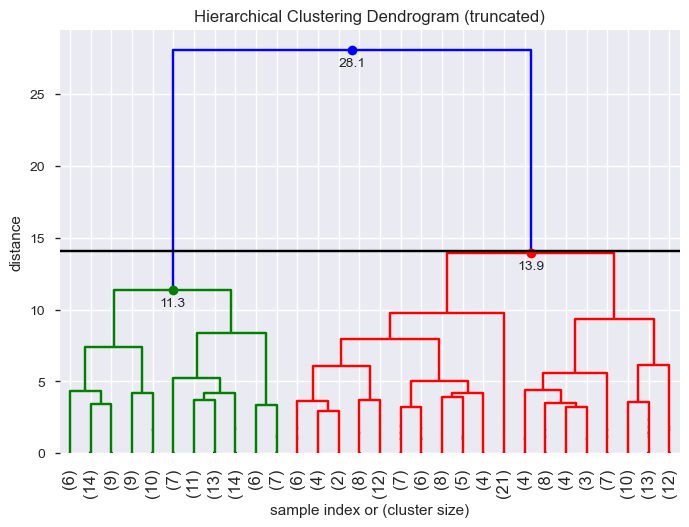

In [192]:
max_d = 14.1
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line which determines the total number of Clusters
)
plt.show()

In [193]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [194]:
# Observations:
# Based on the dendogram and fcluster Analysis the optimal clusters using ward linkage method = 2
# Hence, optimal clusters will be 2

In [195]:
# Performing Agglomerative Clustering based on the Dendogram Analysis
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')
model.fit(bank_df_features)
bank_df_features['GROUP'] = model.labels_ # New Column in the features
bank_df_features.groupby(["GROUP"]).count()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
GROUP,,,,,,
0,144,144,144,144,144,144
1,106,106,106,106,106,106


In [196]:
bank_df_features

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,GROUP
0,2,2,1,1,1,2,0
1,0,0,1,1,1,0,0
2,1,1,1,1,1,1,0
3,2,2,2,2,2,2,0
4,0,0,2,2,2,0,0
5,1,1,2,2,2,1,0
6,2,2,1,2,2,2,0
7,2,2,2,1,1,2,0
8,2,2,1,2,1,2,0
9,2,2,1,1,2,2,0


In [197]:
# clustered data clearly displayses B, NB classes distinctively
bank_df_features.groupby(['GROUP']).count()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
GROUP,,,,,,
0,144,144,144,144,144,144
1,106,106,106,106,106,106


In [198]:
# original data
bank_df.groupby(['Class']).count()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
Class,,,,,,
0,143,143,143,143,143,143
1,107,107,107,107,107,107


In [212]:
from sklearn.model_selection import train_test_split
# We transform (centralize) the entire X (independent variable data) to zscores through transformation
from sklearn.preprocessing import StandardScaler
y = bank_df_features['GROUP'] # Target Variable
X = bank_df_features.drop(['GROUP'],axis=1) # Independent Variables
# Train, test split to create the classification model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,random_state = 10)

In [213]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

In [214]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [215]:
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.857, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.771, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ......... C=0.1, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.600, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.571, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........... C=1, gamma=1, kernel=poly, score=0.971, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=1.000, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.286, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.286, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.343, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.429, total=   0.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] .

[CV] ... C=1, gamma=0.0001, kernel=sigmoid, score=0.571, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ... C=1, gamma=0.0001, kernel=sigmoid, score=0.571, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ... C=1, gamma=0.0001, kernel=sigmoid, score=0.571, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=1.000, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ...... C=10, gamma=0.001, kernel=poly, score=0.600, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ...... C=10, gamma=0.001, kernel=poly, score=0.571, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ...... C=10, gamma=0.001, kernel=poly, score=0.571, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ...... C=10, gamma=0.001, kernel=poly, score=0.571, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ...... C=10, gamma=0.001, kernel=poly, score=0.571, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ... C=10, gamma=0.001, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] .

[CV] ...... C=100, gamma=0.01, kernel=poly, score=0.886, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .... C=100, gamma=0.01, kernel=linear, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV] .

[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV] .... C=1000, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=1.000, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.2s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [216]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [217]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

SVC(C=0.1, gamma=1, kernel='linear')


In [219]:
from sklearn import metrics
svc_model = SVC(C=0.1, gamma=1, kernel='linear', probability = True, verbose=False)
svc_model.fit(X_train, y_train)
pred = svc_model.predict(X_test)     # model predictions on the test data

score_train = round(svc_model.score(X_train, y_train), 3)   # accuracy on the test data

score_test = round(svc_model.score(X_test, y_test), 3)   # accuracy on the test data

probas1_ = svc_model.fit(X_train, y_train).predict_proba(X_test)

print(score_train, score_test)

print(metrics.confusion_matrix(y_test, pred))

1.0 1.0
[[43  0]
 [ 0 32]]


In [220]:
# Compute ROC curve and area the curve for logistic
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 1.000000


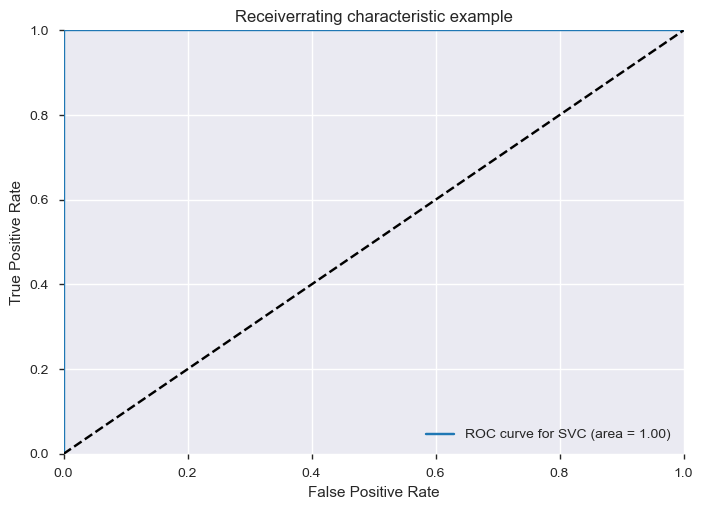

In [221]:
# Plot ROC curve
import pylab as pl
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for SVC (area = %0.2f)' % roc_auc1)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [222]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
cnf_matrix = pd.DataFrame(confusion_matrix(y_test, pred), columns = ['Predict NB', ' Predict B'], index = ['Actual NB', 'Actual B'])
print("Confusion matrix: \n", cnf_matrix)
print("\n Classification report: \n", classification_report(y_test, pred))
print("\n Accuracy score:", accuracy_score(y_test, pred))

Confusion matrix: 
            Predict NB   Predict B
Actual NB          43           0
Actual B            0          32

 Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        32

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


 Accuracy score: 1.0
